In [1]:
import numpy as np
import pandas as pd

# Step 1: Input Parameters
purchase_price = 1000  # Enterprise Value ($M)
equity_contribution = 0.3  # Equity contribution (30%)
interest_rate = 0.08  # Annual interest rate on debt (8%)
debt_term = 5  # Years to pay down debt
revenue_growth_rate = 0.05  # Annual revenue growth rate (5%)
ebitda_margin = 0.2  # EBITDA margin (20%)
exit_multiple = 7  # Exit EBITDA multiple

# Sensitivity Parameters
growth_rates = [0.03, 0.05, 0.07]  # Revenue growth rates
exit_multiples = [6, 7, 8]  # Exit EBITDA multiples

# Function to calculate LBO metrics
def lbo_model(purchase_price, equity_contribution, interest_rate, debt_term, revenue_growth_rate, ebitda_margin, exit_multiple):
    equity = purchase_price * equity_contribution
    debt = purchase_price - equity
    revenue = 500  # Starting revenue ($M)
    ebitda = []
    debt_schedule = []

    # Loop through projection period
    for year in range(1, debt_term + 1):
        revenue *= 1 + revenue_growth_rate
        annual_ebitda = revenue * ebitda_margin
        ebitda.append(annual_ebitda)

        # Calculate annual debt repayment (interest-only with balloon payment)
        if year < debt_term:
            annual_interest = debt * interest_rate
            debt -= annual_ebitda - annual_interest  # Assume all excess EBITDA goes to pay debt
        debt_schedule.append(max(debt, 0))

    # Exit Valuation
    final_year_ebitda = ebitda[-1]
    exit_enterprise_value = final_year_ebitda * exit_multiple
    exit_equity_value = exit_enterprise_value - debt_schedule[-1]
    roi = exit_equity_value / equity
    irr = (exit_equity_value / equity) ** (1 / debt_term) - 1

    return {
        "Revenue Growth Rate": revenue_growth_rate,
        "Exit Multiple": exit_multiple,
        "Exit Enterprise Value": exit_enterprise_value,
        "Exit Equity Value": exit_equity_value,
        "ROI": roi,
        "IRR": irr
    }

# Step 2: Perform Sensitivity Analysis
sensitivity_results = []

for growth_rate in growth_rates:
    for multiple in exit_multiples:
        result = lbo_model(
            purchase_price,
            equity_contribution,
            interest_rate,
            debt_term,
            growth_rate,
            ebitda_margin,
            multiple
        )
        sensitivity_results.append(result)

# Step 3: Convert Results to DataFrame
sensitivity_df = pd.DataFrame(sensitivity_results)

# Display Sensitivity Analysis Results
print("Sensitivity Analysis Results:")
print(sensitivity_df)

# Step 4: Visualize the Sensitivity Analysis (optional)
try:
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Pivot table for heatmap
    pivot_table = sensitivity_df.pivot("Revenue Growth Rate", "Exit Multiple", "IRR")

    plt.figure(figsize=(8, 6))
    sns.heatmap(pivot_table, annot=True, fmt=".2%", cmap="YlGnBu", cbar_kws={"label": "IRR"})
    plt.title("Sensitivity Analysis: IRR by Revenue Growth Rate and Exit Multiple")
    plt.xlabel("Exit Multiple")
    plt.ylabel("Revenue Growth Rate")
    plt.show()

except ImportError:
    print("Visualization skipped. Install matplotlib and seaborn for heatmaps.")

Sensitivity Analysis Results:
   Revenue Growth Rate  Exit Multiple  Exit Enterprise Value  \
0                 0.03              6             695.564445   
1                 0.03              7             811.491852   
2                 0.03              8             927.419259   
3                 0.05              6             765.768938   
4                 0.05              7             893.397094   
5                 0.05              8            1021.025250   
6                 0.07              6             841.531038   
7                 0.07              7             981.786211   
8                 0.07              8            1122.041385   

   Exit Equity Value       ROI       IRR  
0         227.281282  0.757604 -0.054006  
1         343.208689  1.144029  0.027277  
2         459.136096  1.530454  0.088840  
3         320.866151  1.069554  0.013539  
4         448.494307  1.494981  0.083745  
5         576.122463  1.920408  0.139407  
6         420.903331  1.4030

TypeError: DataFrame.pivot() takes 1 positional argument but 4 were given

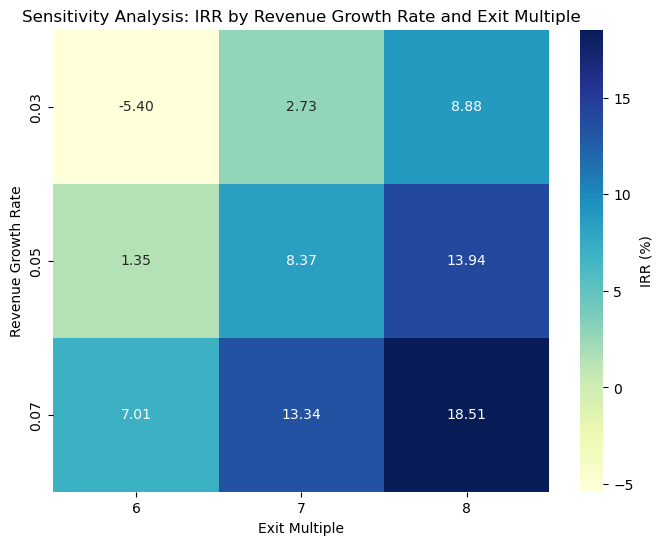

In [3]:
# Step 4: Visualize the Sensitivity Analysis (optional)
try:
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Pivot table for heatmap
    pivot_table = sensitivity_df.pivot(index="Revenue Growth Rate", columns="Exit Multiple", values="IRR")

    # Ensure IRR is formatted as percentages for better readability
    pivot_table *= 100

    plt.figure(figsize=(8, 6))
    sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={"label": "IRR (%)"})
    plt.title("Sensitivity Analysis: IRR by Revenue Growth Rate and Exit Multiple")
    plt.xlabel("Exit Multiple")
    plt.ylabel("Revenue Growth Rate")
    plt.show()

except ImportError:
    print("Visualization skipped. Install matplotlib and seaborn for heatmaps.")